# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
                                    'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
                                    'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,corr_r_MIN,corr_r_MAX,corr_r_MEAN,...,corr_g_Q25,corr_g_Q50,corr_g_Q75,corr_b_MIN,corr_b_MAX,corr_b_MEAN,corr_b_STD,corr_b_Q25,corr_b_Q50,corr_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.072792,0.897968,0.572567,...,0.497556,0.584320,0.668442,0.077811,0.863652,0.518018,0.113930,0.439382,0.518809,0.597901
1,8.189,9.622,2005,818,0.59,2.92,2.47,0.098347,0.909240,0.587272,...,0.542706,0.631789,0.712794,0.052518,0.862133,0.542428,0.116621,0.460031,0.544188,0.626953
2,8.380,9.589,2001,818,0.78,2.88,2.44,0.187811,0.898380,0.612170,...,0.572617,0.653954,0.723677,0.191379,0.880284,0.571301,0.107878,0.497573,0.576860,0.649310
3,8.137,9.449,2040,833,0.52,2.72,2.55,0.020686,0.903616,0.567109,...,0.518111,0.610417,0.693706,0.050205,0.885130,0.532325,0.122542,0.448346,0.535249,0.619780
4,7.696,9.401,1758,717,0.22,2.83,2.14,0.106549,0.890626,0.588641,...,0.539576,0.626229,0.705864,0.132591,0.885208,0.553496,0.113840,0.473676,0.555569,0.634890


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   corr_r_MIN     103 non-null    float64
 8   corr_r_MAX     103 non-null    float64
 9   corr_r_MEAN    103 non-null    float64
 10  corr_r_STD     103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_Q50     103 non-null    float64
 13  corr_r_Q75     103 non-null    float64
 14  corr_g_MIN     103 non-null    float64
 15  corr_g_MAX     103 non-null    float64
 16  corr_g_MEAN    103 non-null    float64
 17  corr_g_STD     103 non-null    float64
 18  corr_g_Q25

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_21360/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,corr_r_MIN,corr_r_MAX,corr_r_MEAN,...,corr_g_Q25,corr_g_Q50,corr_g_Q75,corr_b_MIN,corr_b_MAX,corr_b_MEAN,corr_b_STD,corr_b_Q25,corr_b_Q50,corr_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,0.073579,0.797606,0.468584,...,0.478307,0.565781,0.650812,0.075865,0.866345,0.510064,0.116170,0.429410,0.510315,0.591593
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,0.056017,0.214389,0.174891,...,0.046096,0.044333,0.041063,0.062457,0.038081,0.045793,0.008982,0.048063,0.048657,0.047126
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.062450,0.168530,0.046534,...,0.383336,0.460241,0.540346,-0.118843,0.751174,0.409975,0.092946,0.335992,0.408867,0.476234
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.027204,0.854351,0.502632,...,0.445138,0.538483,0.628094,0.035357,0.847293,0.482231,0.110225,0.401154,0.480816,0.565669
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.063714,0.877336,0.532892,...,0.475896,0.565165,0.651966,0.068192,0.863652,0.509716,0.115968,0.429827,0.511221,0.591945
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,0.110983,0.898174,0.558484,...,0.502652,0.587269,0.671831,0.112101,0.885169,0.531403,0.122193,0.450780,0.533339,0.617455
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,0.241284,0.952182,0.625207,...,0.602592,0.670793,0.733166,0.248034,0.954356,0.664292,0.141161,0.602592,0.670793,0.733166


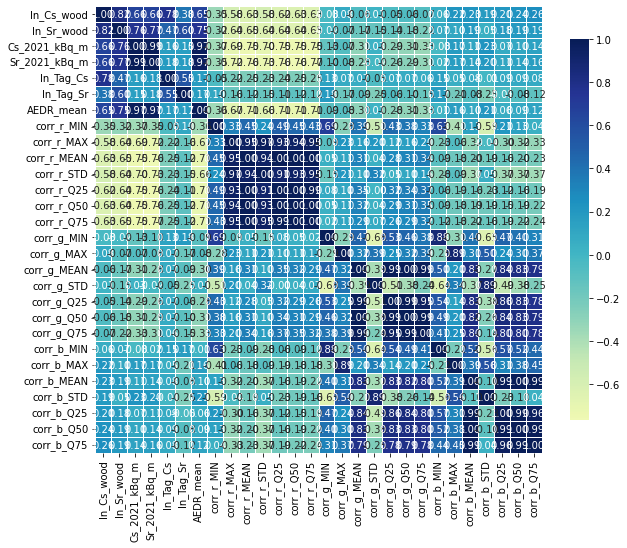

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
                                   'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
                                   'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,corr_r_MIN,corr_r_MAX,corr_r_MEAN,corr_r_STD,corr_r_Q25,corr_r_Q50,corr_r_Q75,corr_g_MIN,corr_g_MAX,corr_g_MEAN,...,corr_b_MEAN,corr_b_STD,corr_b_Q25,corr_b_Q50,corr_b_Q75,Random1,Random2,Random3,Random4,Random5
0,0.072792,0.897968,0.572567,0.121822,0.488754,0.576581,0.661558,0.090252,0.895149,0.581069,...,0.518018,0.113930,0.439382,0.518809,0.597901,11.360039,8.462347,9.870827,7.564743,6.461263
1,0.098347,0.909240,0.587272,0.122924,0.501683,0.593796,0.678807,0.122149,0.903737,0.623279,...,0.542428,0.116621,0.460031,0.544188,0.626953,12.253386,10.511135,15.212161,14.818780,9.993402
2,0.187811,0.898380,0.612170,0.114543,0.540056,0.623865,0.695379,0.168957,0.915888,0.642791,...,0.571301,0.107878,0.497573,0.576860,0.649310,11.326576,8.757584,8.563134,8.790290,8.737895
3,0.020686,0.903616,0.567109,0.128444,0.480991,0.573778,0.660995,0.083553,0.912380,0.601673,...,0.532325,0.122542,0.448346,0.535249,0.619780,11.110102,8.892185,9.456401,9.448649,8.578340
4,0.106549,0.890626,0.588641,0.119364,0.505257,0.594378,0.675643,0.087018,0.901316,0.619317,...,0.553496,0.113840,0.473676,0.555569,0.634890,6.282435,13.365286,11.443060,11.138760,9.315593


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.2550584962765461, -0.09824722669869024, -0.09372337401836806]
    Mean: -0.149
    Std: 0.075

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.98497209 1.07192478 1.13444494]
    Mean: 1.064
    Std: 0.061

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8447943363189697, 0.7962324756734512, 0.9124025775404538]
    Mean: 0.851
    Std: 0.048

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: -0.121 (std: 0.182)
Parameters: {'colsample_bytree': 0.38359149749176374, 'gamma': 0.4474900346457445, 'learning_rate': 0.25613166615908944, 'max_depth': 4, 'n_estimators': 71, 'subsample': 0.6358901058915097}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.29839988, 0.510851  , 0.20876822, 0.46066604, 0.177632  ,
       0.47473073, 0.49987712, 0.4281868 , 0.26539116, 0.40260606,
       0.19193501, 0.20297661, 0.46236424, 0.35525885, 0.32124496,
       0.45347633, 0.28302646, 0.5422142 , 0.53174877, 0.50073814,
       0.23282747, 0.26794419, 0.21380911, 0.28401484, 0.53151703,
       0.40130935, 0.20311775, 0.36741314, 0.59097233, 0.34075503]), 'std_fit_time': array([0.04706458, 0.0090984 , 0.00675927, 0.04719538, 0.00648505,
       0.0143469 , 0.00902288, 0.01002729, 0.04348494, 0.01093486,
       0.01571551, 0.0065608 , 0.00856269, 0.00808623, 0.04143083,
       0.09602317, 0.00725452, 0.00694365, 0.08228573, 0.00935041,
       0.00162832, 0.00587655, 0.011416  , 0.00326426, 0.04822471,
       0.00822977, 0.00470921, 0.00417365, 0.01644684, 0.08067408]), 'mean_score_time': array([0.00663085, 0.00635471, 0.00626459, 0.00620537, 0.0065383 ,
       0.0062501 , 0.00631537, 0.00619855, 0.00627384, 0.00628428,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.38359149749176374
Gamma: 0.4474900346457445
Learning_rate: 0.25613166615908944
Max_depth: 4
N_estimators: 71
Subsample: 0.6358901058915097


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.73466	validation_1-rmse:1.84607
[1]	validation_0-rmse:1.40012	validation_1-rmse:1.54885


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.15410	validation_1-rmse:1.31472
[3]	validation_0-rmse:0.98408	validation_1-rmse:1.22574
[4]	validation_0-rmse:0.84291	validation_1-rmse:1.11969
[5]	validation_0-rmse:0.72523	validation_1-rmse:1.06083
[6]	validation_0-rmse:0.65547	validation_1-rmse:1.03550
[7]	validation_0-rmse:0.57685	validation_1-rmse:0.97466
[8]	validation_0-rmse:0.52906	validation_1-rmse:0.96894
[9]	validation_0-rmse:0.49230	validation_1-rmse:0.94363
[10]	validation_0-rmse:0.46227	validation_1-rmse:0.94233
[11]	validation_0-rmse:0.44284	validation_1-rmse:0.91279
[12]	validation_0-rmse:0.41227	validation_1-rmse:0.91418
[13]	validation_0-rmse:0.38592	validation_1-rmse:0.89346
[14]	validation_0-rmse:0.37080	validation_1-rmse:0.88780
[15]	validation_0-rmse:0.35452	validation_1-rmse:0.88194
[16]	validation_0-rmse:0.35067	validation_1-rmse:0.88233
[17]	validation_0-rmse:0.33386	validation_1-rmse:0.86871
[18]	validation_0-rmse:0.32925	validation_1-rmse:0.86955
[19]	validation_0-rmse:0.32972	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.95284	validation_1-rmse:1.07874
[4]	validation_0-rmse:0.85055	validation_1-rmse:0.95438
[5]	validation_0-rmse:0.70817	validation_1-rmse:0.86762
[6]	validation_0-rmse:0.62184	validation_1-rmse:0.88274
[7]	validation_0-rmse:0.54347	validation_1-rmse:0.85904
[8]	validation_0-rmse:0.48234	validation_1-rmse:0.87011
[9]	validation_0-rmse:0.45286	validation_1-rmse:0.88033
[10]	validation_0-rmse:0.43100	validation_1-rmse:0.86015
[11]	validation_0-rmse:0.41023	validation_1-rmse:0.86785
[12]	validation_0-rmse:0.40263	validation_1-rmse:0.87730
[13]	validation_0-rmse:0.38295	validation_1-rmse:0.85152
[14]	validation_0-rmse:0.36538	validation_1-rmse:0.86174
[15]	validation_0-rmse:0.36482	validation_1-rmse:0.86194
[16]	validation_0-rmse:0.35177	validation_1-rmse:0.84302
[17]	validation_0-rmse:0.32431	validation_1-rmse:0.85930
[18]	validation_0-rmse:0.31268	validation_1-rmse:0.86260
[19]	validation_0-rmse:0.30419	validation_1-rmse:0.87017
[20]	validation_0-rmse:0.30232	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:1.45362	validation_1-rmse:1.26737
[2]	validation_0-rmse:1.17961	validation_1-rmse:1.05684
[3]	validation_0-rmse:0.97741	validation_1-rmse:0.92645
[4]	validation_0-rmse:0.80944	validation_1-rmse:0.85302
[5]	validation_0-rmse:0.68692	validation_1-rmse:0.87003
[6]	validation_0-rmse:0.61774	validation_1-rmse:0.87313
[7]	validation_0-rmse:0.55161	validation_1-rmse:0.91784
[8]	validation_0-rmse:0.48936	validation_1-rmse:0.92481
[9]	validation_0-rmse:0.45209	validation_1-rmse:0.93595
[10]	validation_0-rmse:0.41897	validation_1-rmse:0.92874
[11]	validation_0-rmse:0.40335	validation_1-rmse:0.92279
[12]	validation_0-rmse:0.38023	validation_1-rmse:0.91826
[13]	validation_0-rmse:0.36124	validation_1-rmse:0.91353
[14]	validation_0-rmse:0.33643	validation_1-rmse:0.93737
[15]	validation_0-rmse:0.33161	validation_1-rmse:0.94351
[16]	validation_0-rmse:0.32037	validation_1-rmse:0.94316
[17]	validation_0-rmse:0.31182	validation_1-rmse:0.94716
[18]	validation_0-rmse:0.31102	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.30649	validation_1-rmse:1.06779
[20]	validation_0-rmse:0.29849	validation_1-rmse:1.07091
[21]	validation_0-rmse:0.29383	validation_1-rmse:1.08271
[22]	validation_0-rmse:0.28746	validation_1-rmse:1.08521
[23]	validation_0-rmse:0.28603	validation_1-rmse:1.08733
[24]	validation_0-rmse:0.28264	validation_1-rmse:1.08679
[25]	validation_0-rmse:0.28279	validation_1-rmse:1.08632
[26]	validation_0-rmse:0.28318	validation_1-rmse:1.08568
[27]	validation_0-rmse:0.27823	validation_1-rmse:1.08534
[28]	validation_0-rmse:0.27788	validation_1-rmse:1.08586
[29]	validation_0-rmse:0.27786	validation_1-rmse:1.08589
[30]	validation_0-rmse:0.27782	validation_1-rmse:1.08597
[31]	validation_0-rmse:0.27799	validation_1-rmse:1.08566
[32]	validation_0-rmse:0.27791	validation_1-rmse:1.08579
[33]	validation_0-rmse:0.27780	validation_1-rmse:1.08600
[34]	validation_0-rmse:0.27021	validation_1-rmse:1.08129
[35]	validation_0-rmse:0.27031	validation_1-rmse:1.08101
[36]	validation_0-rmse:0.27020	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.28647	validation_1-rmse:0.97328
[21]	validation_0-rmse:0.28628	validation_1-rmse:0.97342
[22]	validation_0-rmse:0.28645	validation_1-rmse:0.97330
[23]	validation_0-rmse:0.28600	validation_1-rmse:0.97391
[24]	validation_0-rmse:0.27775	validation_1-rmse:0.97349
[25]	validation_0-rmse:0.27770	validation_1-rmse:0.97387
[26]	validation_0-rmse:0.27775	validation_1-rmse:0.97348
[27]	validation_0-rmse:0.27531	validation_1-rmse:0.96123
[28]	validation_0-rmse:0.27136	validation_1-rmse:0.96085
[0]	validation_0-rmse:1.68603	validation_1-rmse:1.85066
[1]	validation_0-rmse:1.34182	validation_1-rmse:1.56077
[2]	validation_0-rmse:1.09003	validation_1-rmse:1.41088
[3]	validation_0-rmse:0.92213	validation_1-rmse:1.31495
[4]	validation_0-rmse:0.75859	validation_1-rmse:1.24832
[5]	validation_0-rmse:0.67706	validation_1-rmse:1.19708
[6]	validation_0-rmse:0.60144	validation_1-rmse:1.15712
[7]	validation_0-rmse:0.53845	validation_1-rmse:1.14230
[8]	validation_0-rmse:0.50288	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.30878	validation_1-rmse:1.10864
[21]	validation_0-rmse:0.29832	validation_1-rmse:1.09775
[22]	validation_0-rmse:0.28056	validation_1-rmse:1.10656
[23]	validation_0-rmse:0.27776	validation_1-rmse:1.10359
[24]	validation_0-rmse:0.27287	validation_1-rmse:1.08882
[25]	validation_0-rmse:0.27310	validation_1-rmse:1.09021
[26]	validation_0-rmse:0.26419	validation_1-rmse:1.09544
[27]	validation_0-rmse:0.25635	validation_1-rmse:1.10481
[28]	validation_0-rmse:0.25642	validation_1-rmse:1.10512
[29]	validation_0-rmse:0.25623	validation_1-rmse:1.10402
[30]	validation_0-rmse:0.25651	validation_1-rmse:1.10549
[31]	validation_0-rmse:0.24560	validation_1-rmse:1.11114
[32]	validation_0-rmse:0.24571	validation_1-rmse:1.11164
[33]	validation_0-rmse:0.24547	validation_1-rmse:1.10972
[34]	validation_0-rmse:0.24552	validation_1-rmse:1.10884
[35]	validation_0-rmse:0.24554	validation_1-rmse:1.10871
[0]	validation_0-rmse:1.71212	validation_1-rmse:1.83117
[1]	validation_0-rmse:1.39969	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.30808	validation_1-rmse:0.99804
[19]	validation_0-rmse:0.30753	validation_1-rmse:0.99460
[20]	validation_0-rmse:0.29352	validation_1-rmse:0.99590
[21]	validation_0-rmse:0.27712	validation_1-rmse:1.00780
[22]	validation_0-rmse:0.26982	validation_1-rmse:1.00502
[23]	validation_0-rmse:0.25728	validation_1-rmse:1.01388
[24]	validation_0-rmse:0.25729	validation_1-rmse:1.01460
[25]	validation_0-rmse:0.25729	validation_1-rmse:1.01464
[26]	validation_0-rmse:0.25756	validation_1-rmse:1.01947
[27]	validation_0-rmse:0.25733	validation_1-rmse:1.01581
[28]	validation_0-rmse:0.24918	validation_1-rmse:1.00663
[29]	validation_0-rmse:0.24922	validation_1-rmse:0.99621
[30]	validation_0-rmse:0.24906	validation_1-rmse:0.99912
[31]	validation_0-rmse:0.23937	validation_1-rmse:0.99160
[32]	validation_0-rmse:0.23935	validation_1-rmse:0.99509
[33]	validation_0-rmse:0.23936	validation_1-rmse:0.99547
[0]	validation_0-rmse:1.67019	validation_1-rmse:1.86033
[1]	validation_0-rmse:1.37713	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.27679	validation_1-rmse:1.06240
[20]	validation_0-rmse:0.27686	validation_1-rmse:1.06713
[21]	validation_0-rmse:0.27682	validation_1-rmse:1.06674
[22]	validation_0-rmse:0.27671	validation_1-rmse:1.06366
[23]	validation_0-rmse:0.27184	validation_1-rmse:1.06479
[24]	validation_0-rmse:0.27184	validation_1-rmse:1.06502
[25]	validation_0-rmse:0.27185	validation_1-rmse:1.06422
[26]	validation_0-rmse:0.27200	validation_1-rmse:1.06254
[27]	validation_0-rmse:0.27185	validation_1-rmse:1.06446
[28]	validation_0-rmse:0.26689	validation_1-rmse:1.06191
[29]	validation_0-rmse:0.25744	validation_1-rmse:1.05406
[30]	validation_0-rmse:0.25532	validation_1-rmse:1.05354
[31]	validation_0-rmse:0.25534	validation_1-rmse:1.05394
[32]	validation_0-rmse:0.25531	validation_1-rmse:1.05241
[33]	validation_0-rmse:0.25562	validation_1-rmse:1.04929
[34]	validation_0-rmse:0.25563	validation_1-rmse:1.04923
[35]	validation_0-rmse:0.25539	validation_1-rmse:1.05099
[36]	validation_0-rmse:0.25278	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.28304	validation_1-rmse:1.03055
[19]	validation_0-rmse:0.26640	validation_1-rmse:1.02606
[20]	validation_0-rmse:0.25944	validation_1-rmse:1.02905
[21]	validation_0-rmse:0.25206	validation_1-rmse:1.03360
[22]	validation_0-rmse:0.24747	validation_1-rmse:1.03194
[23]	validation_0-rmse:0.24734	validation_1-rmse:1.03326
[24]	validation_0-rmse:0.23074	validation_1-rmse:1.03847
[25]	validation_0-rmse:0.22488	validation_1-rmse:1.03469
[26]	validation_0-rmse:0.22560	validation_1-rmse:1.03119
[27]	validation_0-rmse:0.22535	validation_1-rmse:1.03203
[28]	validation_0-rmse:0.22499	validation_1-rmse:1.03372
[29]	validation_0-rmse:0.22483	validation_1-rmse:1.03558
[30]	validation_0-rmse:0.22487	validation_1-rmse:1.03726
[0]	validation_0-rmse:1.71913	validation_1-rmse:1.71884
[1]	validation_0-rmse:1.39948	validation_1-rmse:1.42113
[2]	validation_0-rmse:1.17484	validation_1-rmse:1.24447
[3]	validation_0-rmse:1.02164	validation_1-rmse:1.16735
[4]	validation_0-rmse:0.87931	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.33940	validation_1-rmse:0.88634
[20]	validation_0-rmse:0.32948	validation_1-rmse:0.86947
[21]	validation_0-rmse:0.31958	validation_1-rmse:0.85468
[22]	validation_0-rmse:0.31399	validation_1-rmse:0.84681
[23]	validation_0-rmse:0.30858	validation_1-rmse:0.85266
[24]	validation_0-rmse:0.30344	validation_1-rmse:0.85423
[25]	validation_0-rmse:0.30339	validation_1-rmse:0.85388
[26]	validation_0-rmse:0.30346	validation_1-rmse:0.85435
[27]	validation_0-rmse:0.30182	validation_1-rmse:0.85556
[28]	validation_0-rmse:0.28811	validation_1-rmse:0.86472
[29]	validation_0-rmse:0.28806	validation_1-rmse:0.86395
[30]	validation_0-rmse:0.27286	validation_1-rmse:0.87171
[0]	validation_0-rmse:1.76391	validation_1-rmse:1.50241
[1]	validation_0-rmse:1.41819	validation_1-rmse:1.17908
[2]	validation_0-rmse:1.17033	validation_1-rmse:0.98068
[3]	validation_0-rmse:0.96896	validation_1-rmse:0.90985
[4]	validation_0-rmse:0.82418	validation_1-rmse:0.85168
[5]	validation_0-rmse:0.71435	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.28982	validation_1-rmse:0.81446
[21]	validation_0-rmse:0.28408	validation_1-rmse:0.81411
[22]	validation_0-rmse:0.27421	validation_1-rmse:0.81517
[23]	validation_0-rmse:0.27018	validation_1-rmse:0.81488
[24]	validation_0-rmse:0.26989	validation_1-rmse:0.81496
[25]	validation_0-rmse:0.26762	validation_1-rmse:0.81480
[26]	validation_0-rmse:0.26709	validation_1-rmse:0.81491
[27]	validation_0-rmse:0.26700	validation_1-rmse:0.81496
[28]	validation_0-rmse:0.26364	validation_1-rmse:0.80974
[29]	validation_0-rmse:0.26357	validation_1-rmse:0.80980
[30]	validation_0-rmse:0.26415	validation_1-rmse:0.80959
[31]	validation_0-rmse:0.25937	validation_1-rmse:0.80599
[32]	validation_0-rmse:0.25928	validation_1-rmse:0.80600
[33]	validation_0-rmse:0.25470	validation_1-rmse:0.80633
[34]	validation_0-rmse:0.25472	validation_1-rmse:0.80633
[35]	validation_0-rmse:0.25428	validation_1-rmse:0.80648
[36]	validation_0-rmse:0.24933	validation_1-rmse:0.80885
[37]	validation_0-rmse:0.24933	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.26469	validation_1-rmse:1.19066
[20]	validation_0-rmse:0.26317	validation_1-rmse:1.18208
[21]	validation_0-rmse:0.26329	validation_1-rmse:1.18415
[22]	validation_0-rmse:0.26318	validation_1-rmse:1.18276
[23]	validation_0-rmse:0.25025	validation_1-rmse:1.17548
[24]	validation_0-rmse:0.25032	validation_1-rmse:1.17453
[25]	validation_0-rmse:0.25026	validation_1-rmse:1.17528
[26]	validation_0-rmse:0.23635	validation_1-rmse:1.16897
[27]	validation_0-rmse:0.23652	validation_1-rmse:1.17231
[28]	validation_0-rmse:0.23633	validation_1-rmse:1.17056
[29]	validation_0-rmse:0.23642	validation_1-rmse:1.16826
[0]	validation_0-rmse:1.69823	validation_1-rmse:1.77932
[1]	validation_0-rmse:1.35809	validation_1-rmse:1.52871
[2]	validation_0-rmse:1.09356	validation_1-rmse:1.32589
[3]	validation_0-rmse:0.93291	validation_1-rmse:1.23230
[4]	validation_0-rmse:0.79898	validation_1-rmse:1.19890
[5]	validation_0-rmse:0.70926	validation_1-rmse:1.13798
[6]	validation_0-rmse:0.63489	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.30954	validation_1-rmse:1.02968
[21]	validation_0-rmse:0.29342	validation_1-rmse:1.03738
[22]	validation_0-rmse:0.28244	validation_1-rmse:1.03597
[23]	validation_0-rmse:0.26854	validation_1-rmse:1.04613
[24]	validation_0-rmse:0.26856	validation_1-rmse:1.04626
[25]	validation_0-rmse:0.26862	validation_1-rmse:1.04658
[26]	validation_0-rmse:0.26857	validation_1-rmse:1.04630
[27]	validation_0-rmse:0.26849	validation_1-rmse:1.04562
[28]	validation_0-rmse:0.26850	validation_1-rmse:1.04462
[29]	validation_0-rmse:0.26900	validation_1-rmse:1.04268
[30]	validation_0-rmse:0.26917	validation_1-rmse:1.04233
[31]	validation_0-rmse:0.26620	validation_1-rmse:1.04591
[32]	validation_0-rmse:0.26635	validation_1-rmse:1.04561
[33]	validation_0-rmse:0.26574	validation_1-rmse:1.04721
[34]	validation_0-rmse:0.26559	validation_1-rmse:1.04821
[35]	validation_0-rmse:0.26558	validation_1-rmse:1.04911
[36]	validation_0-rmse:0.25585	validation_1-rmse:1.05162
[37]	validation_0-rmse:0.25573	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.31289	validation_1-rmse:1.15334
[20]	validation_0-rmse:0.30429	validation_1-rmse:1.14839
[21]	validation_0-rmse:0.30120	validation_1-rmse:1.15189
[22]	validation_0-rmse:0.29184	validation_1-rmse:1.15282
[23]	validation_0-rmse:0.29255	validation_1-rmse:1.14929
[24]	validation_0-rmse:0.28696	validation_1-rmse:1.16475
[25]	validation_0-rmse:0.28719	validation_1-rmse:1.16406
[26]	validation_0-rmse:0.28701	validation_1-rmse:1.16458
[27]	validation_0-rmse:0.27732	validation_1-rmse:1.15630
[28]	validation_0-rmse:0.27651	validation_1-rmse:1.15796
[29]	validation_0-rmse:0.27164	validation_1-rmse:1.15595
[30]	validation_0-rmse:0.27138	validation_1-rmse:1.15851
[31]	validation_0-rmse:0.27144	validation_1-rmse:1.15969
[32]	validation_0-rmse:0.27146	validation_1-rmse:1.15981
[33]	validation_0-rmse:0.26042	validation_1-rmse:1.17358
[34]	validation_0-rmse:0.24547	validation_1-rmse:1.17353
[35]	validation_0-rmse:0.24557	validation_1-rmse:1.17239
[36]	validation_0-rmse:0.23729	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.30379	validation_1-rmse:1.06012
[20]	validation_0-rmse:0.29367	validation_1-rmse:1.05254
[21]	validation_0-rmse:0.28732	validation_1-rmse:1.04596
[22]	validation_0-rmse:0.26959	validation_1-rmse:1.04301
[23]	validation_0-rmse:0.26949	validation_1-rmse:1.04202
[24]	validation_0-rmse:0.25920	validation_1-rmse:1.02885
[25]	validation_0-rmse:0.25921	validation_1-rmse:1.02864
[26]	validation_0-rmse:0.25921	validation_1-rmse:1.03183
[27]	validation_0-rmse:0.25932	validation_1-rmse:1.03328
[28]	validation_0-rmse:0.25923	validation_1-rmse:1.03216
[29]	validation_0-rmse:0.25920	validation_1-rmse:1.02865
[30]	validation_0-rmse:0.25856	validation_1-rmse:1.03352
[31]	validation_0-rmse:0.25845	validation_1-rmse:1.03118
[32]	validation_0-rmse:0.25848	validation_1-rmse:1.03223
[33]	validation_0-rmse:0.25853	validation_1-rmse:1.03310
[34]	validation_0-rmse:0.25688	validation_1-rmse:1.03350
[35]	validation_0-rmse:0.25681	validation_1-rmse:1.03112
[36]	validation_0-rmse:0.25681	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.31021	validation_1-rmse:0.91142
[21]	validation_0-rmse:0.30982	validation_1-rmse:0.91402
[22]	validation_0-rmse:0.29868	validation_1-rmse:0.90482
[23]	validation_0-rmse:0.27794	validation_1-rmse:0.89989
[24]	validation_0-rmse:0.25897	validation_1-rmse:0.91529
[25]	validation_0-rmse:0.25951	validation_1-rmse:0.91801
[26]	validation_0-rmse:0.25895	validation_1-rmse:0.91500
[0]	validation_0-rmse:1.73297	validation_1-rmse:1.72268
[1]	validation_0-rmse:1.37764	validation_1-rmse:1.47469
[2]	validation_0-rmse:1.12360	validation_1-rmse:1.23916
[3]	validation_0-rmse:0.93946	validation_1-rmse:1.20125
[4]	validation_0-rmse:0.81609	validation_1-rmse:1.13055
[5]	validation_0-rmse:0.70454	validation_1-rmse:1.07873
[6]	validation_0-rmse:0.63520	validation_1-rmse:1.04133
[7]	validation_0-rmse:0.58494	validation_1-rmse:0.99569
[8]	validation_0-rmse:0.53007	validation_1-rmse:1.04861
[9]	validation_0-rmse:0.48978	validation_1-rmse:1.02214
[10]	validation_0-rmse:0.46805	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.30772	validation_1-rmse:1.08318
[20]	validation_0-rmse:0.29946	validation_1-rmse:1.07380
[21]	validation_0-rmse:0.29499	validation_1-rmse:1.08877
[22]	validation_0-rmse:0.29477	validation_1-rmse:1.08883
[23]	validation_0-rmse:0.28866	validation_1-rmse:1.07233
[24]	validation_0-rmse:0.28406	validation_1-rmse:1.07135
[25]	validation_0-rmse:0.28406	validation_1-rmse:1.07142
[26]	validation_0-rmse:0.28421	validation_1-rmse:1.07161
[27]	validation_0-rmse:0.27579	validation_1-rmse:1.06811
[0]	validation_0-rmse:1.69092	validation_1-rmse:1.79768
[1]	validation_0-rmse:1.37329	validation_1-rmse:1.57771
[2]	validation_0-rmse:1.14873	validation_1-rmse:1.42134
[3]	validation_0-rmse:0.96558	validation_1-rmse:1.25702
[4]	validation_0-rmse:0.82050	validation_1-rmse:1.15066
[5]	validation_0-rmse:0.70517	validation_1-rmse:1.06271
[6]	validation_0-rmse:0.60939	validation_1-rmse:0.98261
[7]	validation_0-rmse:0.53308	validation_1-rmse:0.92838
[8]	validation_0-rmse:0.47654	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.30544	validation_1-rmse:0.83104
[21]	validation_0-rmse:0.29738	validation_1-rmse:0.83488
[22]	validation_0-rmse:0.28868	validation_1-rmse:0.83807
[23]	validation_0-rmse:0.28597	validation_1-rmse:0.84806
[24]	validation_0-rmse:0.28591	validation_1-rmse:0.84579
[25]	validation_0-rmse:0.28591	validation_1-rmse:0.84573
[26]	validation_0-rmse:0.28203	validation_1-rmse:0.84987
[27]	validation_0-rmse:0.28198	validation_1-rmse:0.85405
[28]	validation_0-rmse:0.27875	validation_1-rmse:0.85268
[29]	validation_0-rmse:0.27871	validation_1-rmse:0.84895
[30]	validation_0-rmse:0.27883	validation_1-rmse:0.85397
[31]	validation_0-rmse:0.27219	validation_1-rmse:0.86088
[32]	validation_0-rmse:0.26255	validation_1-rmse:0.86165
[33]	validation_0-rmse:0.25264	validation_1-rmse:0.86434
[34]	validation_0-rmse:0.25260	validation_1-rmse:0.86344
[35]	validation_0-rmse:0.25002	validation_1-rmse:0.85253
[36]	validation_0-rmse:0.25003	validation_1-rmse:0.85291
[37]	validation_0-rmse:0.25012	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.30130	validation_1-rmse:0.84570
[19]	validation_0-rmse:0.29375	validation_1-rmse:0.84762
[20]	validation_0-rmse:0.28240	validation_1-rmse:0.85175
[21]	validation_0-rmse:0.28090	validation_1-rmse:0.84499
[22]	validation_0-rmse:0.28070	validation_1-rmse:0.84616
[23]	validation_0-rmse:0.26637	validation_1-rmse:0.83698
[24]	validation_0-rmse:0.26644	validation_1-rmse:0.83651
[25]	validation_0-rmse:0.26634	validation_1-rmse:0.83718
[26]	validation_0-rmse:0.26630	validation_1-rmse:0.83765
[27]	validation_0-rmse:0.25748	validation_1-rmse:0.83438
[0]	validation_0-rmse:1.76812	validation_1-rmse:1.59177
[1]	validation_0-rmse:1.40476	validation_1-rmse:1.31478
[2]	validation_0-rmse:1.16090	validation_1-rmse:1.14604
[3]	validation_0-rmse:0.97320	validation_1-rmse:1.03450
[4]	validation_0-rmse:0.82412	validation_1-rmse:0.93526
[5]	validation_0-rmse:0.71998	validation_1-rmse:0.90721
[6]	validation_0-rmse:0.62918	validation_1-rmse:0.89207
[7]	validation_0-rmse:0.57581	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.29581	validation_1-rmse:0.88447
[20]	validation_0-rmse:0.29574	validation_1-rmse:0.88454
[21]	validation_0-rmse:0.28813	validation_1-rmse:0.88426
[22]	validation_0-rmse:0.27650	validation_1-rmse:0.87522
[23]	validation_0-rmse:0.27644	validation_1-rmse:0.87524
[24]	validation_0-rmse:0.27645	validation_1-rmse:0.87523
[25]	validation_0-rmse:0.27001	validation_1-rmse:0.87378
[26]	validation_0-rmse:0.26754	validation_1-rmse:0.87872
[27]	validation_0-rmse:0.26754	validation_1-rmse:0.87872
[28]	validation_0-rmse:0.26752	validation_1-rmse:0.87876
[0]	validation_0-rmse:1.67955	validation_1-rmse:1.81728
[1]	validation_0-rmse:1.34424	validation_1-rmse:1.54150
[2]	validation_0-rmse:1.09278	validation_1-rmse:1.32679
[3]	validation_0-rmse:0.92148	validation_1-rmse:1.21048
[4]	validation_0-rmse:0.80336	validation_1-rmse:1.06728
[5]	validation_0-rmse:0.69265	validation_1-rmse:1.05075
[6]	validation_0-rmse:0.59628	validation_1-rmse:1.00729
[7]	validation_0-rmse:0.54694	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.27384	validation_1-rmse:1.01502
[21]	validation_0-rmse:0.27294	validation_1-rmse:1.01609
[22]	validation_0-rmse:0.26946	validation_1-rmse:1.01917
[23]	validation_0-rmse:0.26941	validation_1-rmse:1.01929
[24]	validation_0-rmse:0.26444	validation_1-rmse:1.01528
[25]	validation_0-rmse:0.26456	validation_1-rmse:1.01458
[26]	validation_0-rmse:0.24748	validation_1-rmse:1.01081
[27]	validation_0-rmse:0.24752	validation_1-rmse:1.01068
[28]	validation_0-rmse:0.24740	validation_1-rmse:1.01175
[0]	validation_0-rmse:1.76780	validation_1-rmse:1.63624
[1]	validation_0-rmse:1.44061	validation_1-rmse:1.41412
[2]	validation_0-rmse:1.17034	validation_1-rmse:1.21213
[3]	validation_0-rmse:0.98891	validation_1-rmse:1.16077
[4]	validation_0-rmse:0.85714	validation_1-rmse:1.10544
[5]	validation_0-rmse:0.74031	validation_1-rmse:1.09035
[6]	validation_0-rmse:0.65962	validation_1-rmse:1.06953
[7]	validation_0-rmse:0.58411	validation_1-rmse:1.04665
[8]	validation_0-rmse:0.52740	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.29877	validation_1-rmse:1.09779
[22]	validation_0-rmse:0.29078	validation_1-rmse:1.09752
[23]	validation_0-rmse:0.29043	validation_1-rmse:1.09775
[24]	validation_0-rmse:0.27991	validation_1-rmse:1.09843
[25]	validation_0-rmse:0.27303	validation_1-rmse:1.09679
[26]	validation_0-rmse:0.27297	validation_1-rmse:1.09650
[27]	validation_0-rmse:0.26785	validation_1-rmse:1.08833
[28]	validation_0-rmse:0.25473	validation_1-rmse:1.08679
[0]	validation_0-rmse:1.71065	validation_1-rmse:1.66782
[1]	validation_0-rmse:1.35613	validation_1-rmse:1.40580
[2]	validation_0-rmse:1.08606	validation_1-rmse:1.24740
[3]	validation_0-rmse:0.89960	validation_1-rmse:1.12440
[4]	validation_0-rmse:0.74583	validation_1-rmse:1.06234
[5]	validation_0-rmse:0.66804	validation_1-rmse:1.01443
[6]	validation_0-rmse:0.59536	validation_1-rmse:0.98560
[7]	validation_0-rmse:0.55551	validation_1-rmse:1.01346
[8]	validation_0-rmse:0.48932	validation_1-rmse:0.99061
[9]	validation_0-rmse:0.44600	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.29109	validation_1-rmse:0.92763
[20]	validation_0-rmse:0.27823	validation_1-rmse:0.90747
[21]	validation_0-rmse:0.27574	validation_1-rmse:0.91148
[22]	validation_0-rmse:0.27595	validation_1-rmse:0.91149
[23]	validation_0-rmse:0.27193	validation_1-rmse:0.90651
[24]	validation_0-rmse:0.27197	validation_1-rmse:0.90657
[25]	validation_0-rmse:0.27204	validation_1-rmse:0.90662
[26]	validation_0-rmse:0.26474	validation_1-rmse:0.90922
[27]	validation_0-rmse:0.26439	validation_1-rmse:0.90601
[28]	validation_0-rmse:0.26440	validation_1-rmse:0.90610
[29]	validation_0-rmse:0.26451	validation_1-rmse:0.90627
[30]	validation_0-rmse:0.26444	validation_1-rmse:0.90617
[31]	validation_0-rmse:0.25767	validation_1-rmse:0.90177
[32]	validation_0-rmse:0.25768	validation_1-rmse:0.90176
[33]	validation_0-rmse:0.25769	validation_1-rmse:0.90174
[34]	validation_0-rmse:0.25767	validation_1-rmse:0.90187
[35]	validation_0-rmse:0.25794	validation_1-rmse:0.90225
[36]	validation_0-rmse:0.25776	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.27745	validation_1-rmse:0.69472
[21]	validation_0-rmse:0.27412	validation_1-rmse:0.69003
[22]	validation_0-rmse:0.27412	validation_1-rmse:0.69010
[23]	validation_0-rmse:0.27411	validation_1-rmse:0.68923
[24]	validation_0-rmse:0.27132	validation_1-rmse:0.68857
[0]	validation_0-rmse:1.67444	validation_1-rmse:1.97888
[1]	validation_0-rmse:1.35610	validation_1-rmse:1.61642
[2]	validation_0-rmse:1.10298	validation_1-rmse:1.44454
[3]	validation_0-rmse:0.91871	validation_1-rmse:1.30822
[4]	validation_0-rmse:0.78818	validation_1-rmse:1.18124
[5]	validation_0-rmse:0.67761	validation_1-rmse:1.09821
[6]	validation_0-rmse:0.59210	validation_1-rmse:1.10556
[7]	validation_0-rmse:0.53441	validation_1-rmse:1.07892
[8]	validation_0-rmse:0.47090	validation_1-rmse:1.05110
[9]	validation_0-rmse:0.42885	validation_1-rmse:1.02756
[10]	validation_0-rmse:0.40989	validation_1-rmse:1.02349
[11]	validation_0-rmse:0.39598	validation_1-rmse:1.00715
[12]	validation_0-rmse:0.37639	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.32382	validation_1-rmse:0.95443
[19]	validation_0-rmse:0.31323	validation_1-rmse:0.93198
[20]	validation_0-rmse:0.29737	validation_1-rmse:0.92356
[21]	validation_0-rmse:0.29743	validation_1-rmse:0.92103
[22]	validation_0-rmse:0.29600	validation_1-rmse:0.92003
[23]	validation_0-rmse:0.29612	validation_1-rmse:0.91669
[24]	validation_0-rmse:0.28308	validation_1-rmse:0.91911
[25]	validation_0-rmse:0.28312	validation_1-rmse:0.91886
[26]	validation_0-rmse:0.28293	validation_1-rmse:0.92089
[27]	validation_0-rmse:0.28291	validation_1-rmse:0.92125
[28]	validation_0-rmse:0.26689	validation_1-rmse:0.92021
[29]	validation_0-rmse:0.26688	validation_1-rmse:0.92078
[30]	validation_0-rmse:0.26709	validation_1-rmse:0.92449
[31]	validation_0-rmse:0.26263	validation_1-rmse:0.91993
[32]	validation_0-rmse:0.26284	validation_1-rmse:0.92306
[33]	validation_0-rmse:0.26274	validation_1-rmse:0.92203
[34]	validation_0-rmse:0.26269	validation_1-rmse:0.92144
[35]	validation_0-rmse:0.26264	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.28314	validation_1-rmse:1.09809
[23]	validation_0-rmse:0.28312	validation_1-rmse:1.09910
[24]	validation_0-rmse:0.27806	validation_1-rmse:1.09693
[25]	validation_0-rmse:0.27809	validation_1-rmse:1.09743
[26]	validation_0-rmse:0.27552	validation_1-rmse:1.09290
[0]	validation_0-rmse:1.72363	validation_1-rmse:1.74331
[1]	validation_0-rmse:1.37602	validation_1-rmse:1.44065
[2]	validation_0-rmse:1.13515	validation_1-rmse:1.27687
[3]	validation_0-rmse:0.95491	validation_1-rmse:1.16609
[4]	validation_0-rmse:0.81088	validation_1-rmse:1.07839
[5]	validation_0-rmse:0.70216	validation_1-rmse:1.04206
[6]	validation_0-rmse:0.61622	validation_1-rmse:1.04890
[7]	validation_0-rmse:0.55179	validation_1-rmse:1.02413
[8]	validation_0-rmse:0.49923	validation_1-rmse:1.03217
[9]	validation_0-rmse:0.47270	validation_1-rmse:1.02411
[10]	validation_0-rmse:0.44792	validation_1-rmse:1.00975
[11]	validation_0-rmse:0.42639	validation_1-rmse:0.98989
[12]	validation_0-rmse:0.40320	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.30503	validation_1-rmse:0.96420
[22]	validation_0-rmse:0.29283	validation_1-rmse:0.96002
[23]	validation_0-rmse:0.28866	validation_1-rmse:0.96176
[24]	validation_0-rmse:0.28851	validation_1-rmse:0.96225
[25]	validation_0-rmse:0.28848	validation_1-rmse:0.96254
[26]	validation_0-rmse:0.28856	validation_1-rmse:0.96323
[27]	validation_0-rmse:0.28851	validation_1-rmse:0.96298
[28]	validation_0-rmse:0.28849	validation_1-rmse:0.96280
[29]	validation_0-rmse:0.28583	validation_1-rmse:0.95989
[30]	validation_0-rmse:0.28042	validation_1-rmse:0.96181
[31]	validation_0-rmse:0.28042	validation_1-rmse:0.96183
[32]	validation_0-rmse:0.27390	validation_1-rmse:0.97817
[33]	validation_0-rmse:0.27425	validation_1-rmse:0.97741
[34]	validation_0-rmse:0.27400	validation_1-rmse:0.97784
[35]	validation_0-rmse:0.27391	validation_1-rmse:0.97814
[0]	validation_0-rmse:1.72079	validation_1-rmse:1.61408
[1]	validation_0-rmse:1.39248	validation_1-rmse:1.30108
[2]	validation_0-rmse:1.14706	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.28099	validation_1-rmse:0.98498
[22]	validation_0-rmse:0.28097	validation_1-rmse:0.98475
[23]	validation_0-rmse:0.27810	validation_1-rmse:0.97856
[24]	validation_0-rmse:0.27614	validation_1-rmse:0.98655
[25]	validation_0-rmse:0.27610	validation_1-rmse:0.98687
[26]	validation_0-rmse:0.27580	validation_1-rmse:0.98758
[27]	validation_0-rmse:0.27333	validation_1-rmse:0.98372
[28]	validation_0-rmse:0.27335	validation_1-rmse:0.98528
[29]	validation_0-rmse:0.26497	validation_1-rmse:0.98354
[30]	validation_0-rmse:0.26579	validation_1-rmse:0.98649
[31]	validation_0-rmse:0.26571	validation_1-rmse:0.98630
[32]	validation_0-rmse:0.25651	validation_1-rmse:0.98043
[33]	validation_0-rmse:0.25666	validation_1-rmse:0.98092
[34]	validation_0-rmse:0.25448	validation_1-rmse:0.98754
[35]	validation_0-rmse:0.25440	validation_1-rmse:0.98713
[36]	validation_0-rmse:0.25433	validation_1-rmse:0.98604
[37]	validation_0-rmse:0.25434	validation_1-rmse:0.98598
[0]	validation_0-rmse:1.76320	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.28547	validation_1-rmse:1.08432
[23]	validation_0-rmse:0.27317	validation_1-rmse:1.09247
[0]	validation_0-rmse:1.70457	validation_1-rmse:1.88182
[1]	validation_0-rmse:1.39387	validation_1-rmse:1.57372
[2]	validation_0-rmse:1.12354	validation_1-rmse:1.40326
[3]	validation_0-rmse:0.93443	validation_1-rmse:1.28223
[4]	validation_0-rmse:0.77500	validation_1-rmse:1.16180
[5]	validation_0-rmse:0.66232	validation_1-rmse:1.13250
[6]	validation_0-rmse:0.59184	validation_1-rmse:1.10149
[7]	validation_0-rmse:0.52411	validation_1-rmse:1.10279
[8]	validation_0-rmse:0.47379	validation_1-rmse:1.09475
[9]	validation_0-rmse:0.43846	validation_1-rmse:1.09542
[10]	validation_0-rmse:0.41557	validation_1-rmse:1.08547
[11]	validation_0-rmse:0.39937	validation_1-rmse:1.09018
[12]	validation_0-rmse:0.37540	validation_1-rmse:1.07346
[13]	validation_0-rmse:0.36549	validation_1-rmse:1.09280
[14]	validation_0-rmse:0.35321	validation_1-rmse:1.07349
[15]	validation_0-rmse:0.34258	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:0.27383	validation_1-rmse:1.06904
[23]	validation_0-rmse:0.26664	validation_1-rmse:1.06455
[24]	validation_0-rmse:0.26061	validation_1-rmse:1.06912
[25]	validation_0-rmse:0.26061	validation_1-rmse:1.07002
[26]	validation_0-rmse:0.26060	validation_1-rmse:1.06978
[27]	validation_0-rmse:0.26081	validation_1-rmse:1.07185
[28]	validation_0-rmse:0.26095	validation_1-rmse:1.07253
[29]	validation_0-rmse:0.26088	validation_1-rmse:1.07223
[30]	validation_0-rmse:0.26077	validation_1-rmse:1.07164
[31]	validation_0-rmse:0.26066	validation_1-rmse:1.07086
[32]	validation_0-rmse:0.26091	validation_1-rmse:1.07232
[33]	validation_0-rmse:0.26117	validation_1-rmse:1.07335
[34]	validation_0-rmse:0.26087	validation_1-rmse:1.07217
[35]	validation_0-rmse:0.26092	validation_1-rmse:1.07240
[36]	validation_0-rmse:0.25645	validation_1-rmse:1.07770
[37]	validation_0-rmse:0.25635	validation_1-rmse:1.07644
[38]	validation_0-rmse:0.25645	validation_1-rmse:1.07767
[39]	validation_0-rmse:0.24999	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 17.667, median: 14.5,
 pred. interval (P(0.025)-P(0.975)): 4.0-56.3, 
 conf. interval (p-value=0.95): 11.227-19.467 
***
Aggregate bias statistic: 
 mean: -2.2, median: -2.212,
 pred. interval (P(0.025)-P(0.975)): -8.085-3.361, 
 conf. interval (p-value=0.95): -3.741--0.83 
***
Aggregate RMSE statistic: 
 mean: 0.942, median: 0.958, pred. interval (P(0.025)-P(0.975)): 0.748-1.144, 
 conf. interval (p-value=0.95): 0.903-1.001 
***
Aggregate MSE statistic: 
 mean: 0.899, median: 0.918, pred. interval (P(0.025)-P(0.975)): 0.562-1.308, 
 conf. interval (p-value=0.95): 0.82-1.005 
***
Aggregate R^2 statistic: 
 mean: -0.212, median: -0.155, pred. interval (P(0.025)-P(0.975)): -0.953-0.18, 
 conf. interval (p-value=0.95): -0.283--0.034 
***
Aggregate bias(%) statistic: 
 mean: -0.863, median: -2.212, pred. interval (P(0.025)-P(0.975)): -3.177-1.431, 
 conf. interval (p-value=0.95): -1.467--0.338 
***
Aggregate RMSE(%) statistic: 
 mea

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.70266
[1]	validation_0-rmse:1.36362
[2]	validation_0-rmse:1.11788


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:0.96971
[4]	validation_0-rmse:0.81376
[5]	validation_0-rmse:0.73100
[6]	validation_0-rmse:0.66275
[7]	validation_0-rmse:0.60573
[8]	validation_0-rmse:0.56060
[9]	validation_0-rmse:0.50313
[10]	validation_0-rmse:0.48100
[11]	validation_0-rmse:0.46443
[12]	validation_0-rmse:0.43003
[13]	validation_0-rmse:0.40907
[14]	validation_0-rmse:0.39827
[15]	validation_0-rmse:0.38039
[16]	validation_0-rmse:0.37415
[17]	validation_0-rmse:0.36088
[18]	validation_0-rmse:0.35034
[19]	validation_0-rmse:0.32851
[20]	validation_0-rmse:0.32302
[21]	validation_0-rmse:0.30659
[22]	validation_0-rmse:0.30156
[23]	validation_0-rmse:0.29236
[24]	validation_0-rmse:0.28622
[25]	validation_0-rmse:0.28468
[26]	validation_0-rmse:0.27967
[27]	validation_0-rmse:0.27962
[28]	validation_0-rmse:0.27966
[29]	validation_0-rmse:0.27969
[30]	validation_0-rmse:0.27301
[31]	validation_0-rmse:0.27148
[32]	validation_0-rmse:0.27040
[33]	validation_0-rmse:0.27024
[34]	validation_0-rmse:0.26753
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 51


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

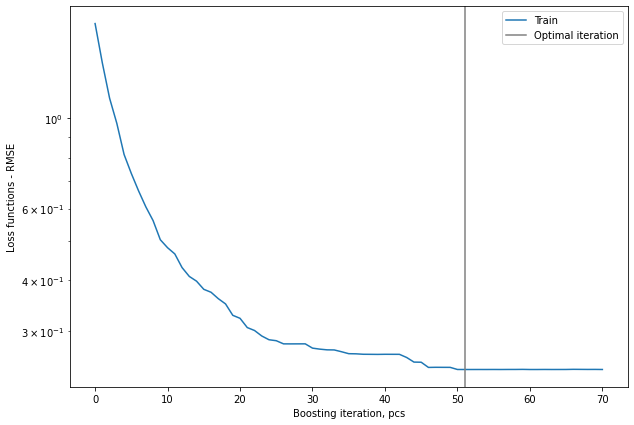

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.02
RMSE: 0.2
Relative RMSE(%):  0.098
MSE: 0.1
R square: 92.8%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.452
a1: 0.817
R^2: 0.945
Uncertainty
a0: 0.45+/-0.05
a1: 0.817+/-0.020


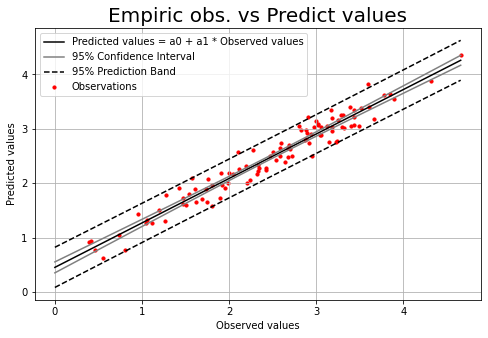

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

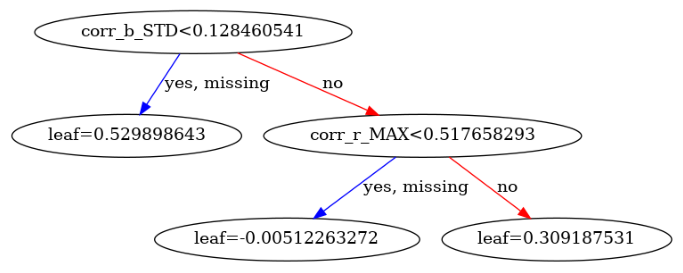

In [36]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

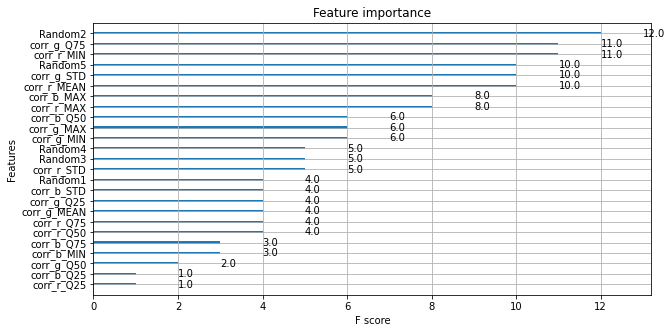

In [38]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

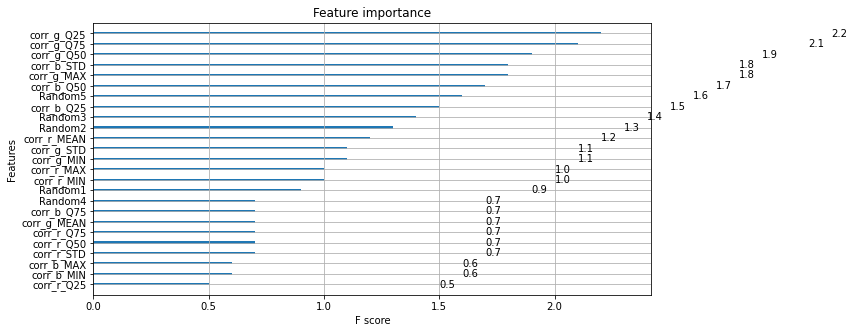

In [39]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

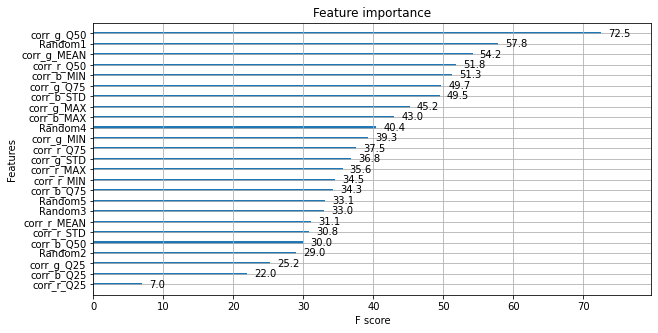

In [40]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [41]:
# Load SHAP`s library
import shap

In [42]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


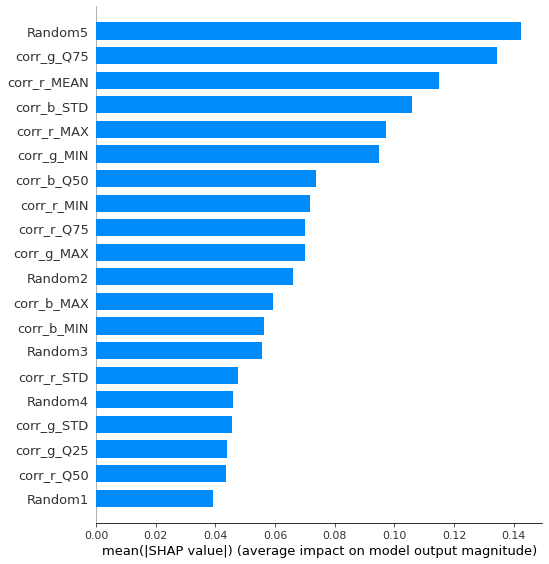

In [43]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

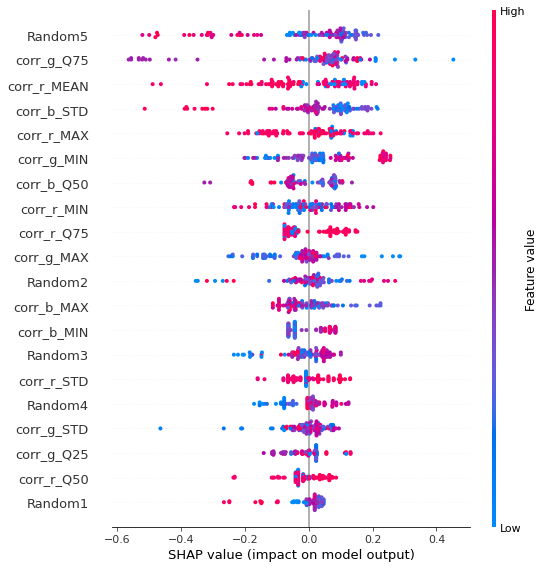

In [44]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

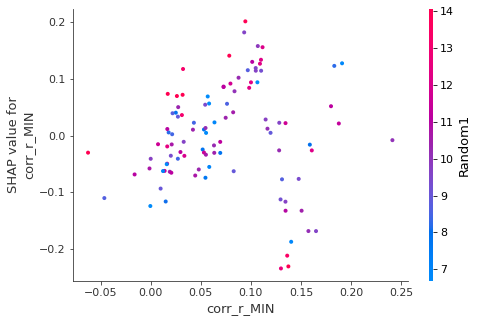

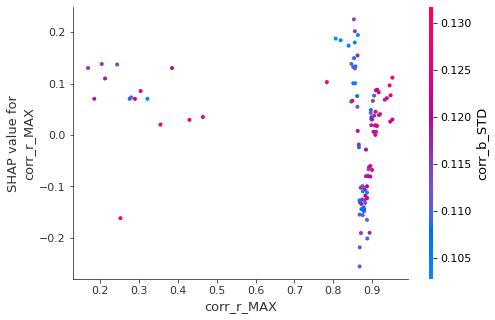

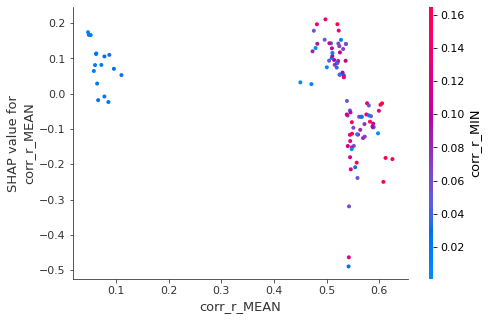

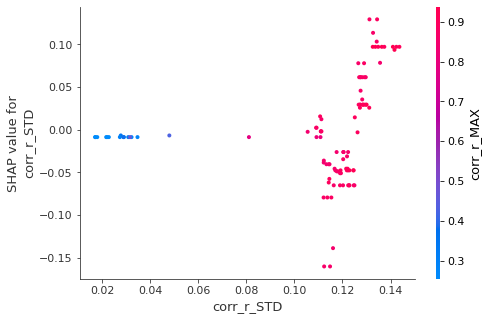

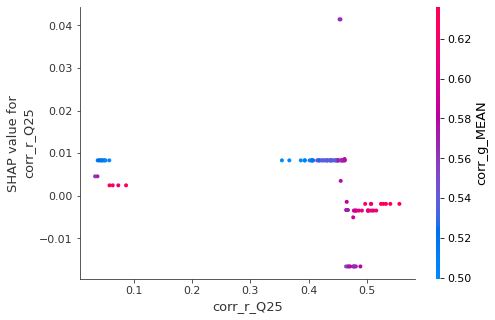

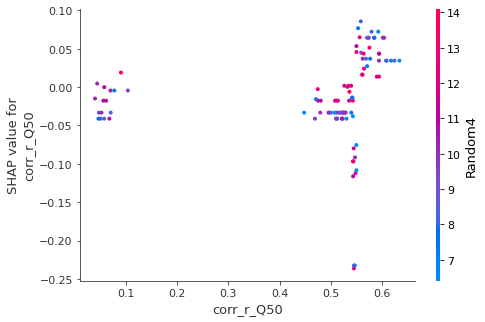

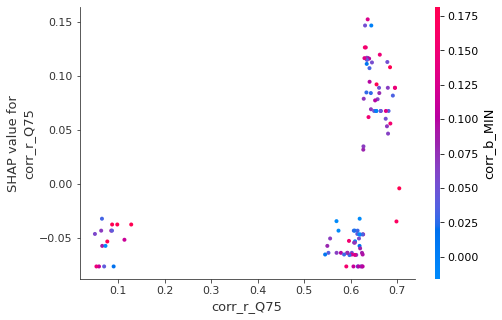

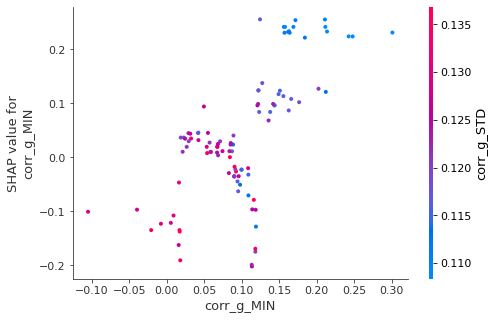

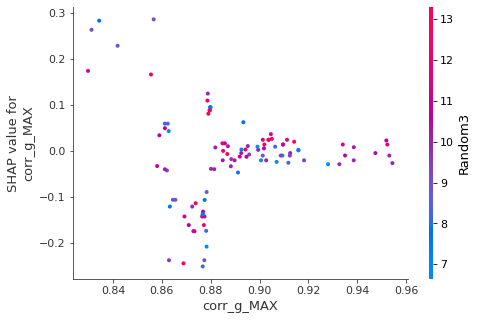

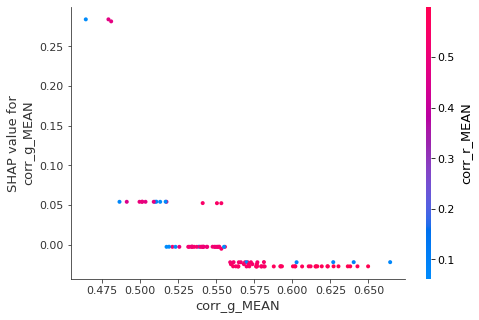

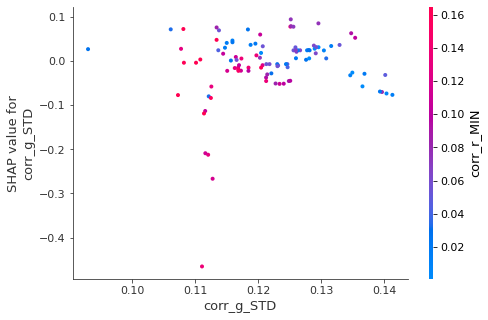

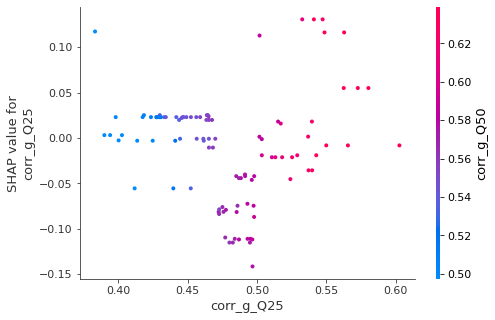

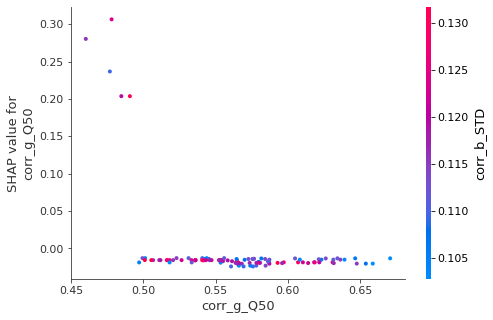

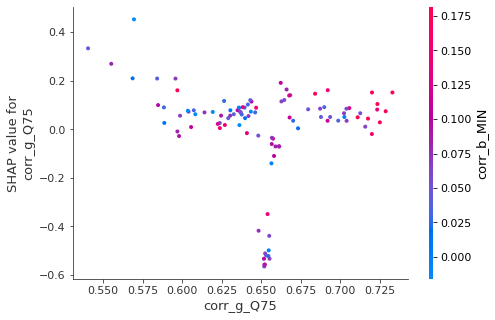

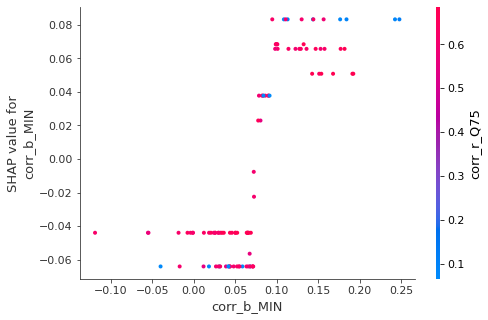

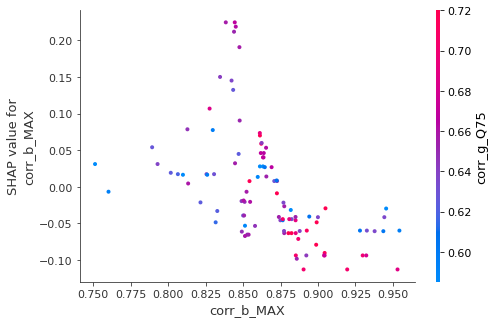

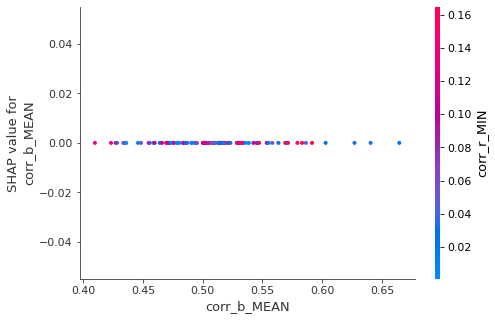

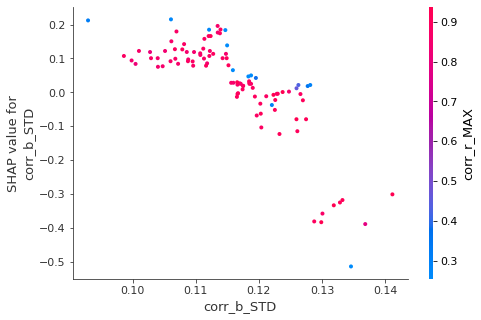

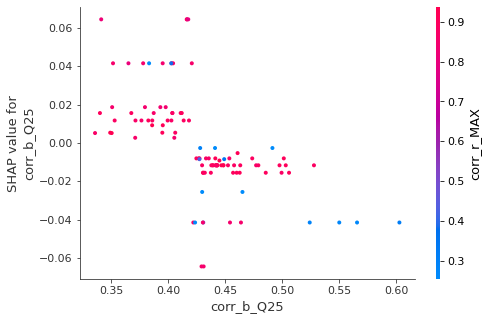

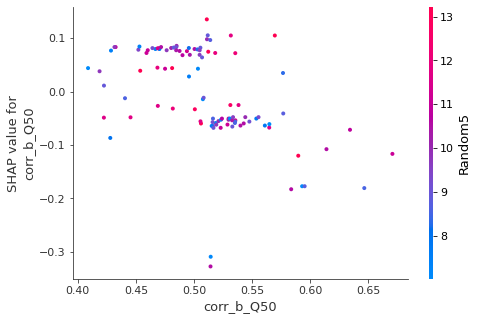

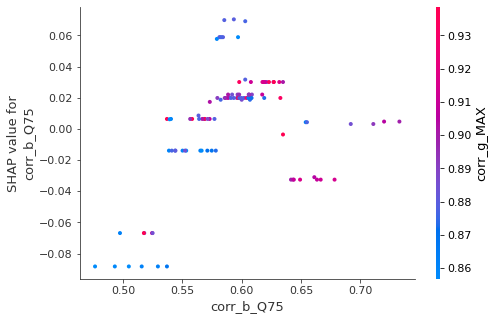

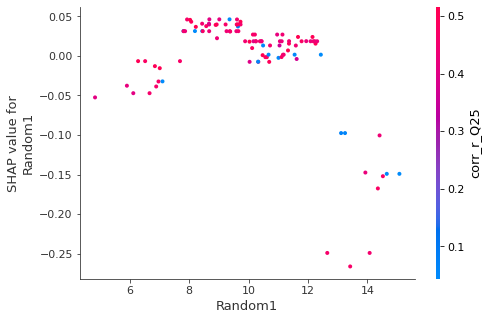

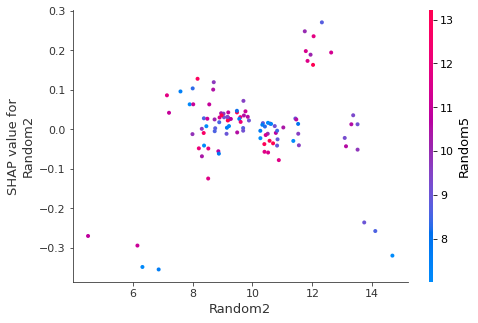

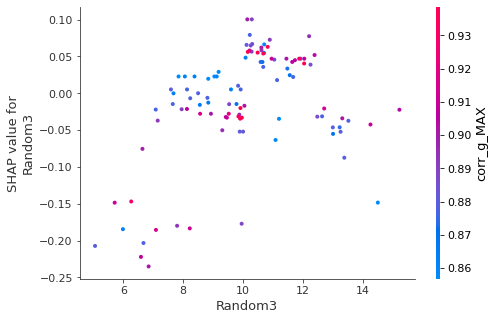

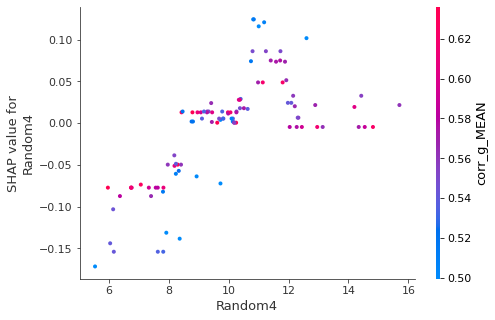

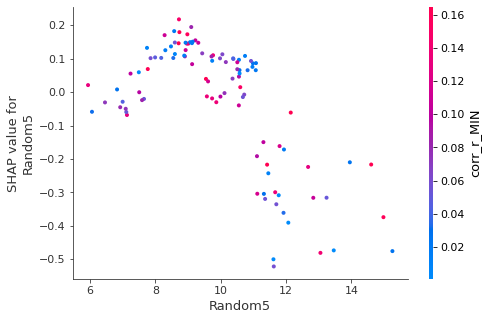

In [45]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")